In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("Train.csv.xls")
df=pd.DataFrame(data)
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [5]:
df['Attrition_rate'] = df['Attrition_rate'].apply(lambda x: 'yes' if x > 0.5 else 'no')

In [6]:
df.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,no
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,no
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,no
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,no
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,no
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,yes
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,no
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,no
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,no
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,no


In [7]:
df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [8]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,no
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,no
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,no
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,no
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,no


In [9]:
df.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [10]:
df["Age"].fillna(df["Age"].mode()[0],inplace=True)
df["Time_of_service"].fillna(df["Time_of_service"].mode()[0],inplace=True)
df["Work_Life_balance"].fillna(df["Work_Life_balance"].mode()[0],inplace=True)
df["VAR2"].fillna(df["VAR2"].mode()[0],inplace=True)
df["VAR4"].fillna(df["VAR4"].mode()[0],inplace=True)

/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_6692/2597968177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mode()[0],inplace=True)
/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_6692/2597968177.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [11]:
df.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    9
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [12]:
object_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,4143,0,42.0,4,0,1,2,2,4.0,4,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0
1,2500,1,24.0,3,1,3,3,0,5.0,4,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0
2,5312,0,58.0,3,0,0,8,2,27.0,3,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0
3,2339,0,26.0,3,1,2,1,1,4.0,3,...,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0
4,3885,0,31.0,1,0,3,3,2,5.0,4,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0


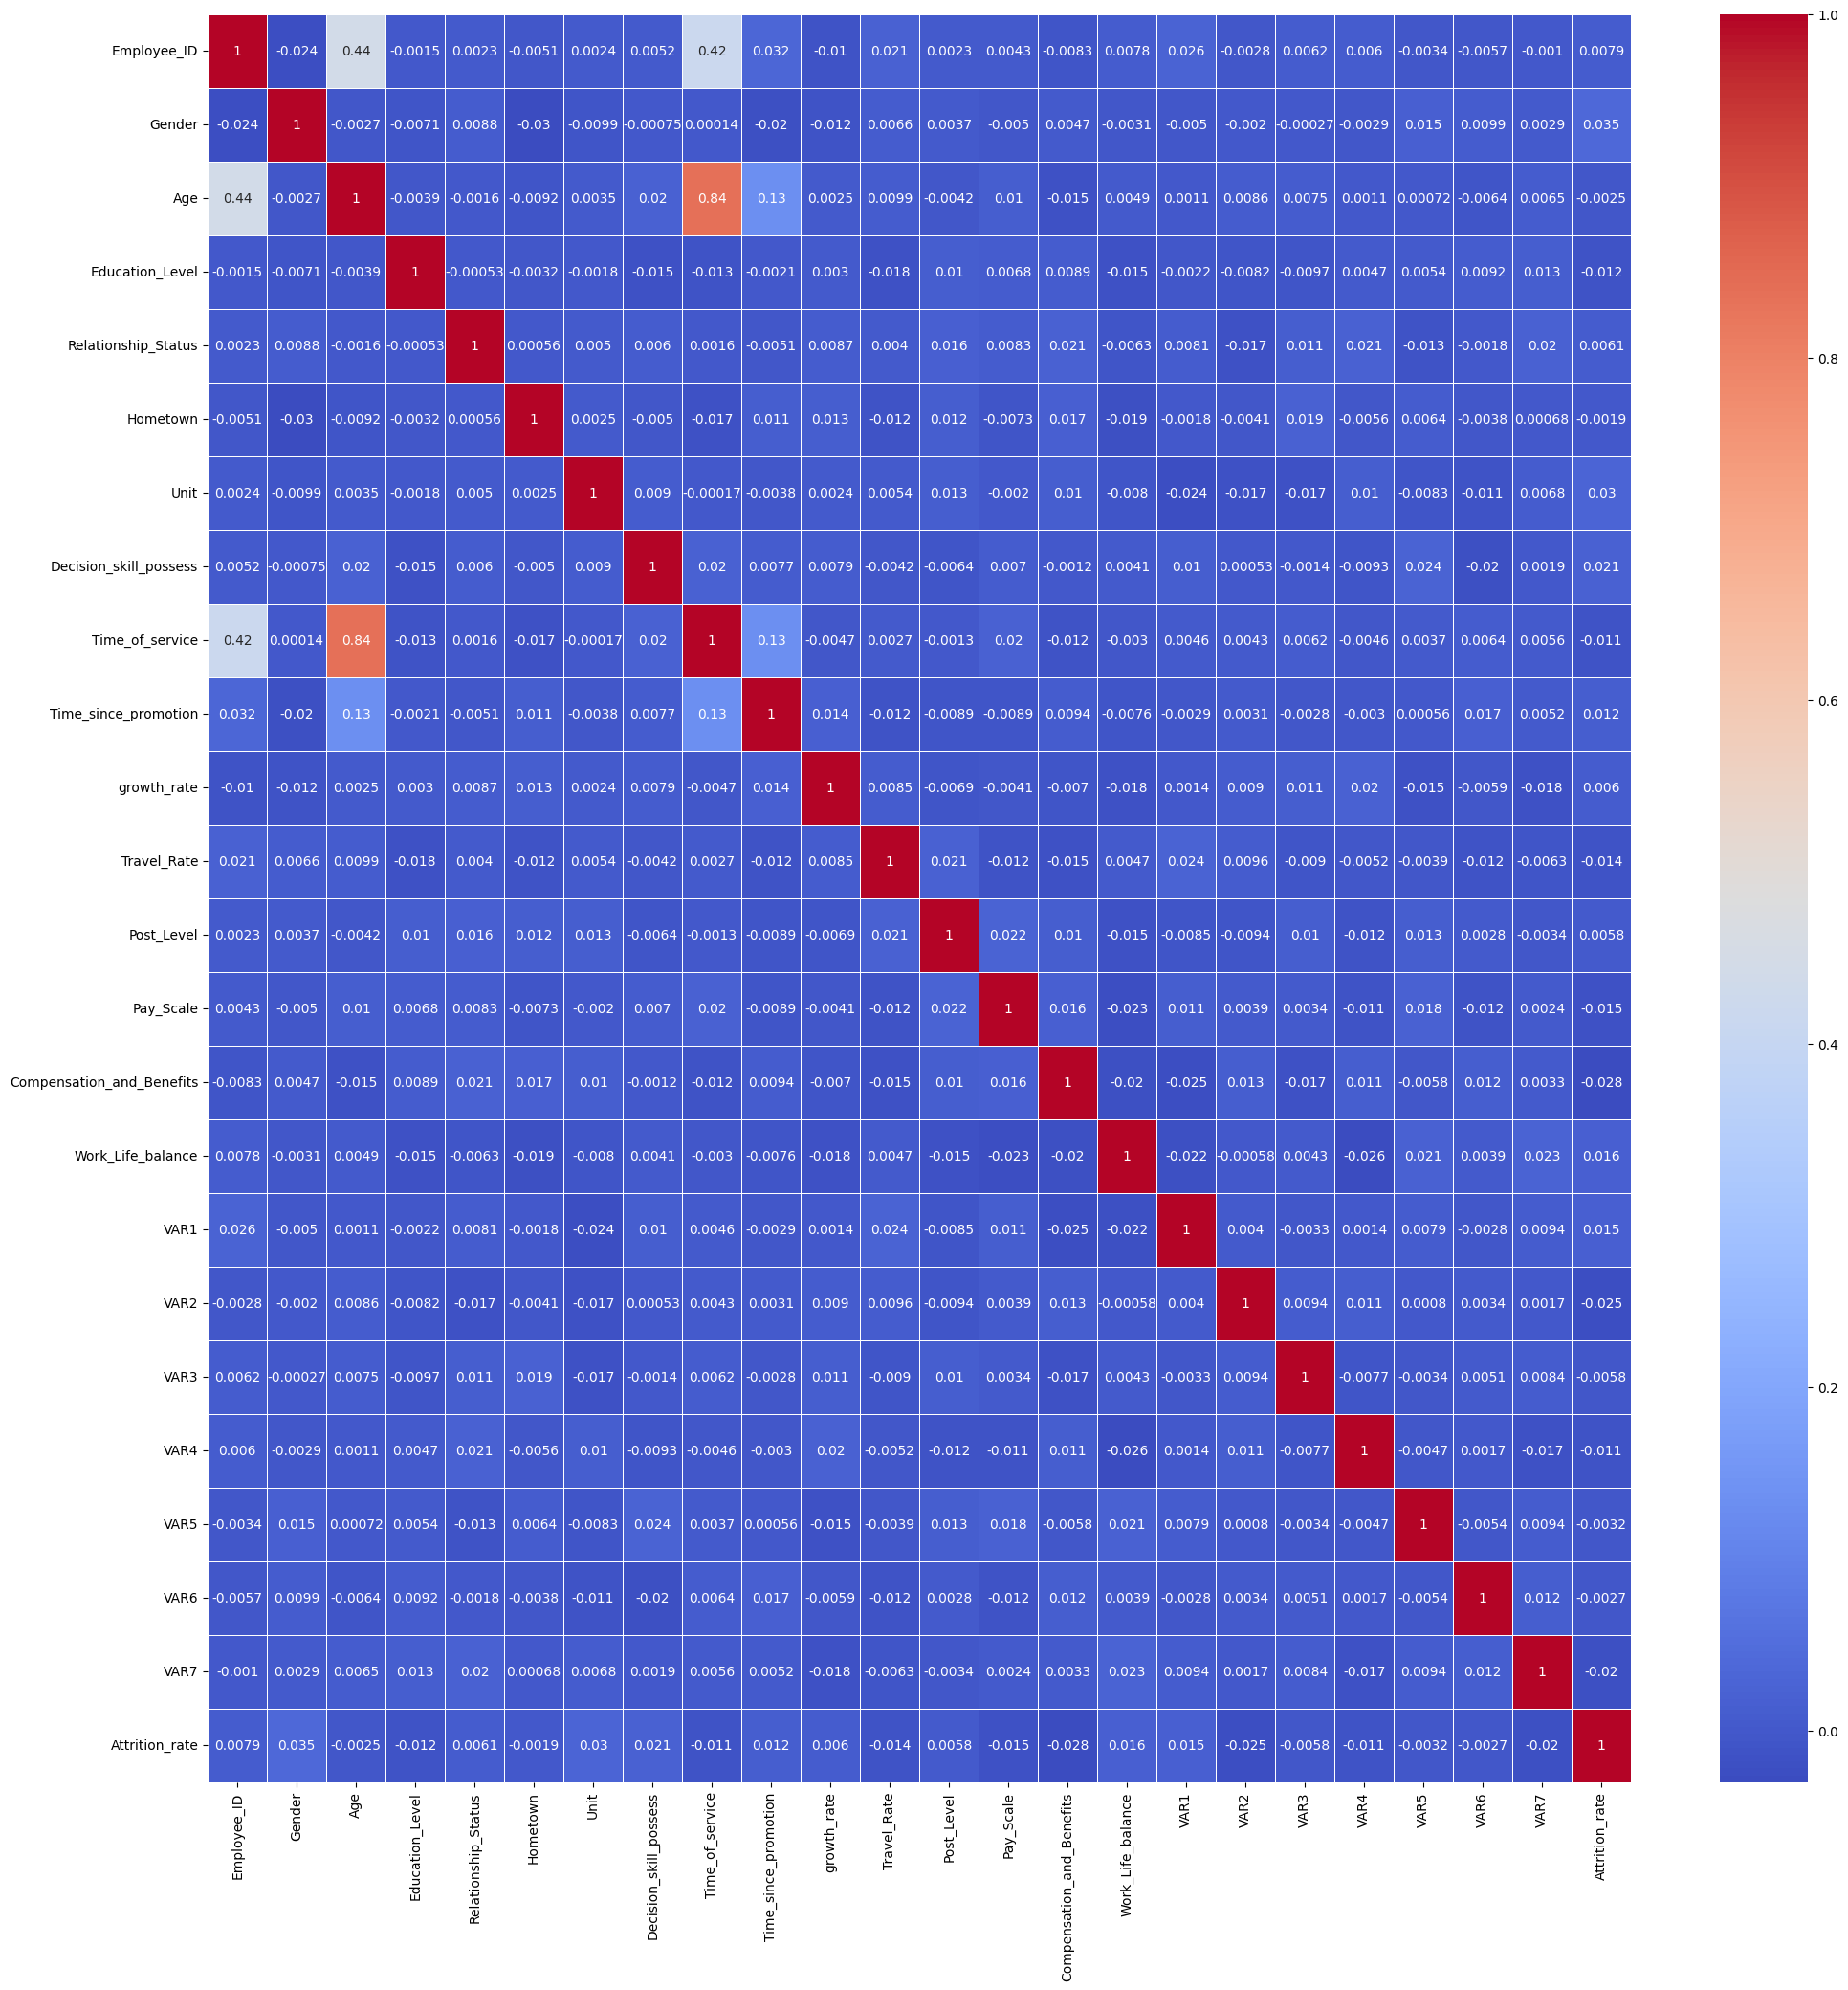

In [14]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

In [15]:
df.drop("VAR3", axis=1, inplace=True)

In [16]:
df.drop("VAR5", axis=1, inplace=True)

In [17]:
df.drop("VAR6", axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   int64  
 1   Gender                     7000 non-null   int64  
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   int64  
 5   Hometown                   7000 non-null   int64  
 6   Unit                       7000 non-null   int64  
 7   Decision_skill_possess     7000 non-null   int64  
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [19]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR4,VAR7,Attrition_rate
0,4143,0,42.0,4,0,1,2,2,4.0,4,...,1,1,7.0,2,3.0,4,0.7516,2.0,3,0
1,2500,1,24.0,3,1,3,3,0,5.0,4,...,0,3,6.0,2,4.0,3,-0.9612,2.0,3,0
2,5312,0,58.0,3,0,0,8,2,27.0,3,...,0,2,8.0,2,1.0,4,-0.9612,3.0,3,0
3,2339,0,26.0,3,1,2,1,1,4.0,3,...,1,3,8.0,2,1.0,3,-1.8176,2.0,3,0
4,3885,0,31.0,1,0,3,3,2,5.0,4,...,1,3,2.0,3,3.0,1,0.7516,2.0,2,0


In [20]:
from sklearn.model_selection import train_test_split

X = df[['Employee_ID','Gender','Age','Education_Level','Relationship_Status','Hometown','Unit','Decision_skill_possess','Time_of_service','Time_since_promotion','Travel_Rate','Post_Level','Pay_Scale','Compensation_and_Benefits','Work_Life_balance','VAR1','VAR2','VAR4','VAR7']]
y = df['Attrition_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5600, 19)
X_test shape: (1400, 19)
y_train shape: (5600,)
y_test shape: (1400,)


In [21]:
X_train.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    9
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR4                         0
VAR7                         0
dtype: int64

In [22]:
X_train["Pay_Scale"].fillna(X_train["Pay_Scale"].mode()[0],inplace=True)

/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_6692/3244871981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Pay_Scale"].fillna(X_train["Pay_Scale"].mode()[0],inplace=True)


In [23]:
X_train.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR4                         0
VAR7                         0
dtype: int64

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
svm_model = SVC(kernel='linear', random_state=42)

# Train SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1283
           1       0.00      0.00      0.00       117

    accuracy                           0.92      1400
   macro avg       0.46      0.50      0.48      1400
weighted avg       0.84      0.92      0.88      1400



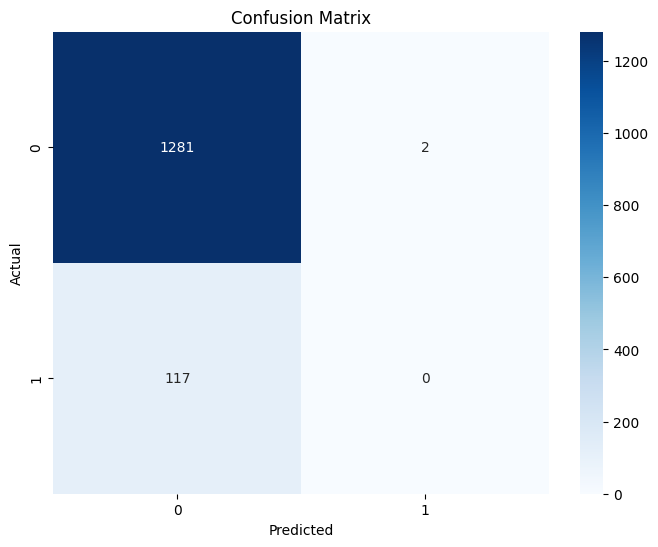

In [26]:
from sklearn.metrics import roc_curve, classification_report
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()